In [104]:
import pandas as pd
import matplotlib.pyplot as plt

byarea  = pd.read_csv("ways_byarea.csv", index_col='value')
byarea['keyvalue'] = [f"{i['key']}={i.name}" for _,i in byarea.iterrows()]
byarea['pixels_per_chip']  = byarea['area'] / byarea['n_chips'] / 100
byarea['objects_per_chip'] = byarea['way'] / byarea['n_chips'] 
byarea = byarea[byarea.keyvalue!='railway=station']
bylength = pd.read_csv("ways_bylength.csv", index_col='value')
bylength['keyvalue'] = [f"{i['key']}={i.name}" for _,i in bylength.iterrows()]


In [105]:
selected_closedways = pd.read_csv('osm key selection - closed ways.csv', index_col='value')
selected_closedways = selected_closedways[selected_closedways['use']==1].copy()
selected_closedways['keyvalue'] = [f"{i['key']}={i.name}" for _,i in selected_closedways.iterrows()]
selected_closedways = byarea[byarea.keyvalue.isin(selected_closedways.keyvalue)]
selected_closedways.shape

(85, 12)

In [106]:
selected_openways = pd.read_csv('osm key selection - open ways.csv', index_col='value')
selected_openways = selected_openways[selected_openways['use']==1].copy()
selected_openways['keyvalue'] = [f"{i['key']}={i.name}" for _,i in selected_openways.iterrows()]
selected_openways = bylength[bylength.keyvalue.isin(selected_openways.keyvalue)].copy()
selected_openways.shape

(3, 10)

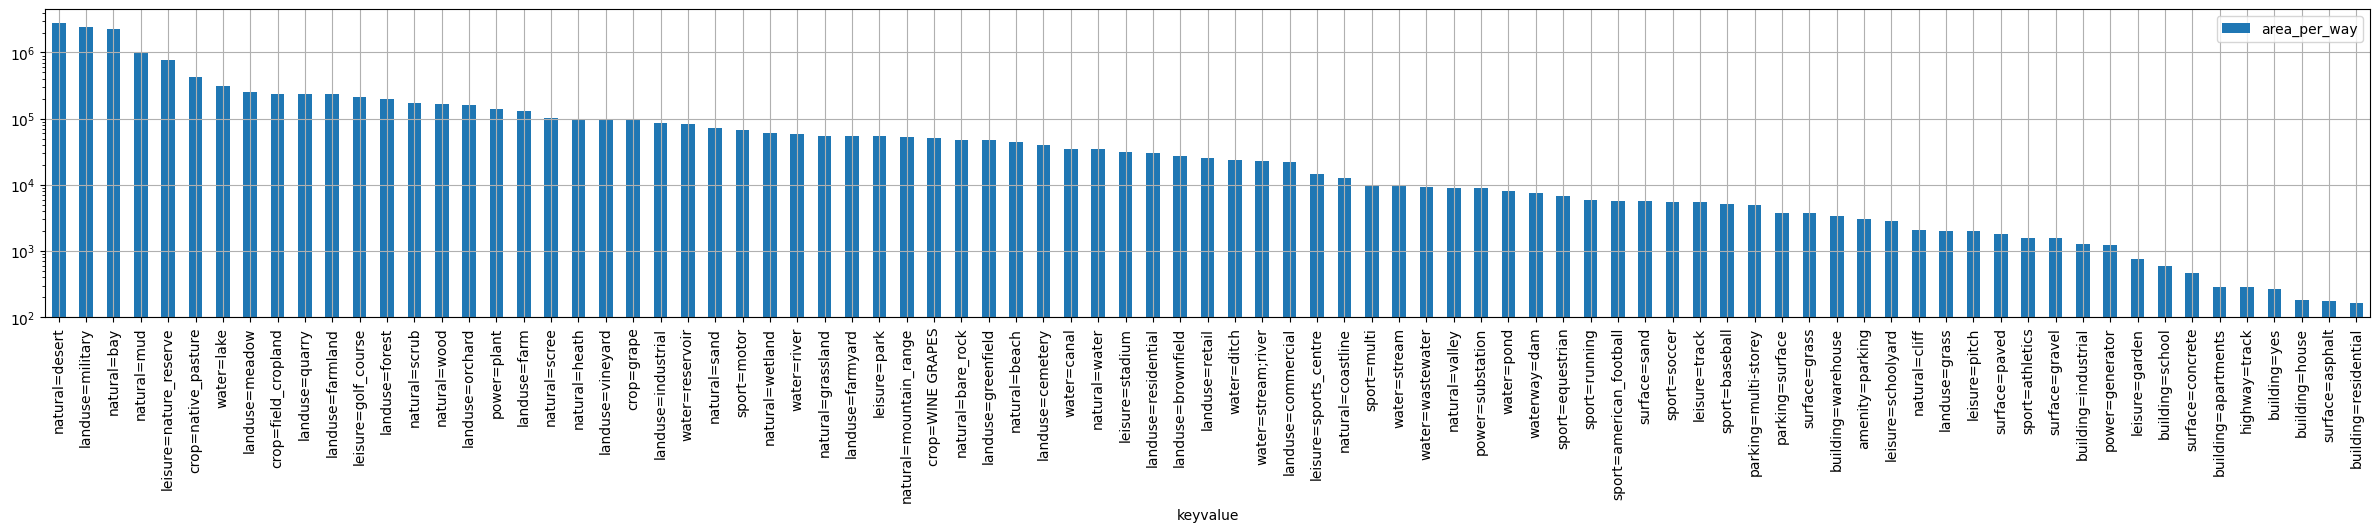

In [109]:
selected_closedways.set_index('keyvalue')[['area_per_way']].sort_values(by='area_per_way', ascending=False).plot(kind='bar', figsize=(30,4))
plt.grid();
plt.yscale('log')

Text(0.5, 0, '')

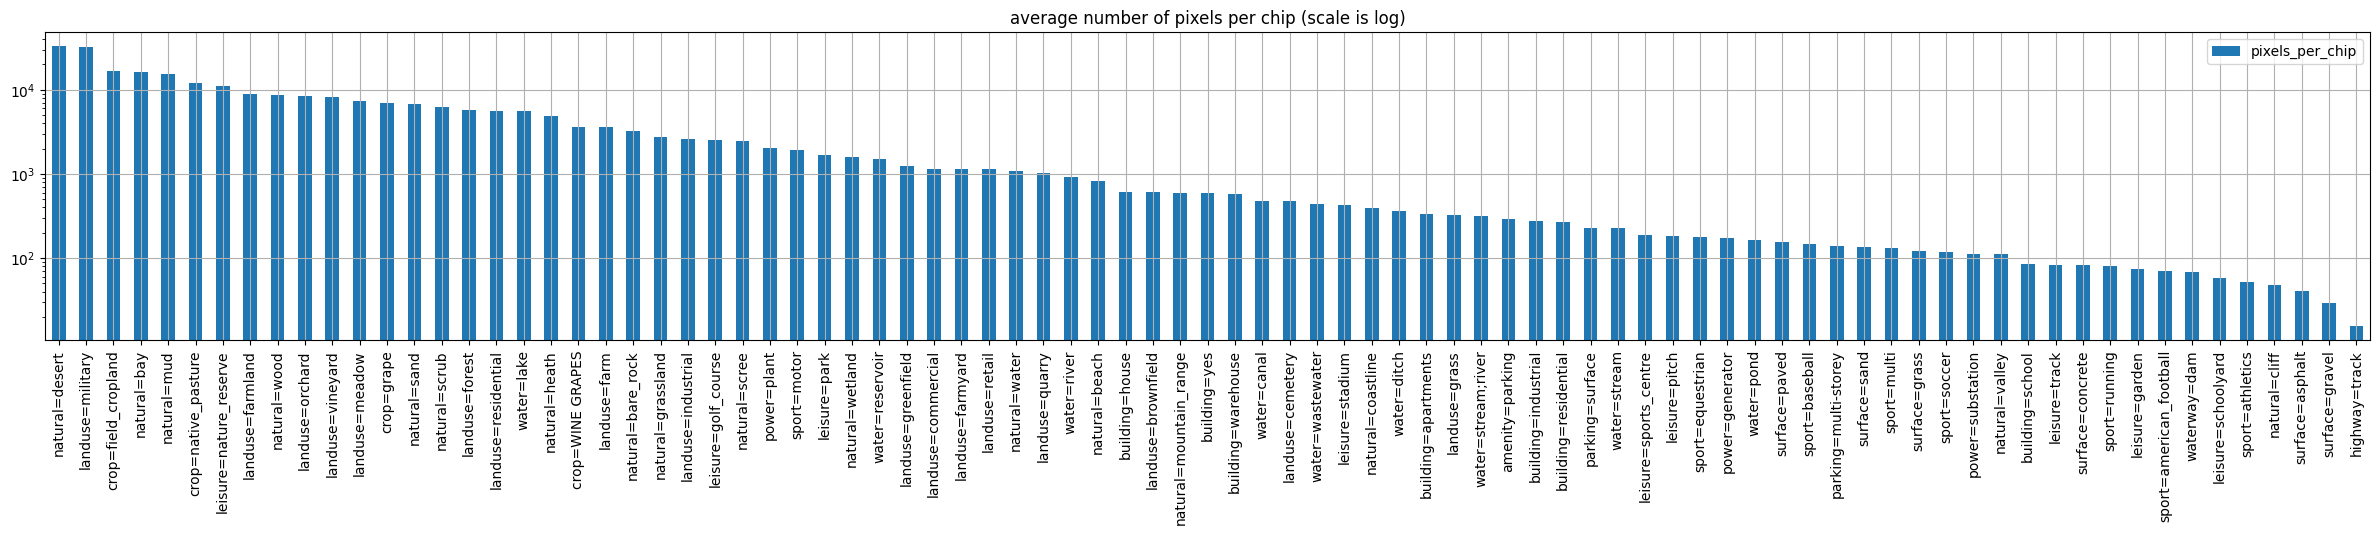

In [110]:
selected_closedways.set_index('keyvalue')[['pixels_per_chip']].sort_values(by='pixels_per_chip', ascending=False).plot(kind='bar', figsize=(30,4))
plt.grid();
plt.yscale('log')
plt.title("average number of pixels per chip (scale is log)")
plt.xlabel("")

Text(0, 0.5, 'average number of osm objects per chip')

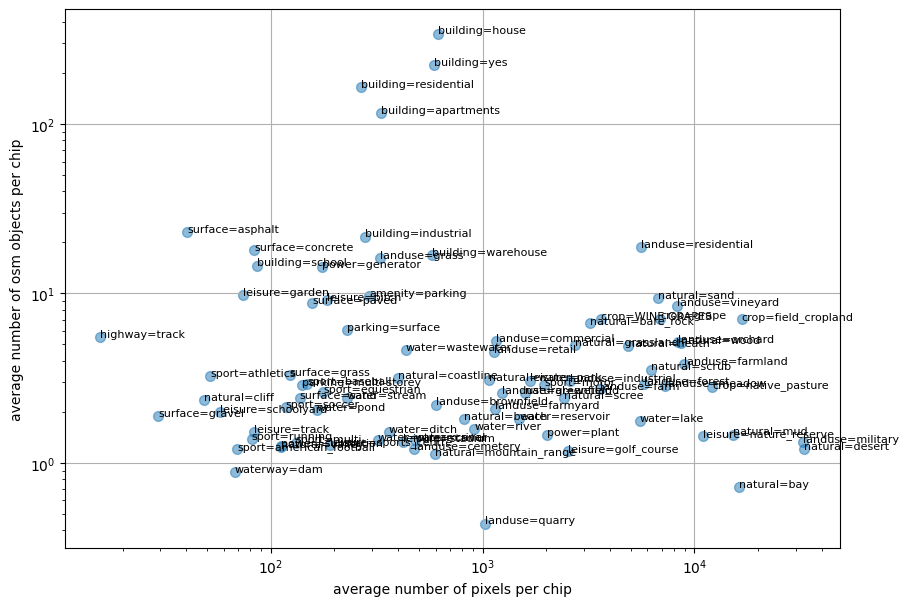

In [112]:
plt.figure(figsize=(10,7))
plt.scatter(selected_closedways['pixels_per_chip'],  selected_closedways['objects_per_chip'], s=50, alpha=.5)
plt.xscale('log')
plt.yscale('log')
for _, i in selected_closedways.iterrows():
    plt.text(i['pixels_per_chip'],  i['objects_per_chip'], i['keyvalue'], fontsize=8)
plt.grid();
plt.xlabel("average number of pixels per chip")
plt.ylabel("average number of osm objects per chip")

In [127]:
for k,_ in selected_closedways['key'].value_counts().items():
    vals = list(selected_closedways[selected_closedways['key']==k].index)
    print (f"{k:10s}", ", ".join(vals))
    print ()

landuse    residential, grass, farmland, meadow, commercial, orchard, vineyard, industrial, retail, farmyard, forest, military, farm, cemetery, brownfield, quarry, greenfield

natural    water, wood, scrub, sand, grassland, wetland, bare_rock, coastline, heath, valley, desert, cliff, scree, beach, mountain_range, mud, bay

leisure    pitch, park, garden, nature_reserve, sports_centre, golf_course, track, schoolyard, stadium

water      pond, reservoir, lake, river, canal, wastewater, stream, ditch, stream;river

sport      baseball, soccer, american_football, running, equestrian, athletics, motor, multi

building   yes, house, residential, apartments, industrial, school, warehouse

surface    asphalt, concrete, paved, gravel, sand, grass

crop       grape, field_cropland, WINE GRAPES, native_pasture

power      generator, substation, plant

parking    surface, multi-storey

highway    track

waterway   dam

amenity    parking



In [102]:
selected_openways

,key,area,count,length,n_chips,node,way,area_per_way,length_per_way,keyvalue
value,,,,,,,,,,
motorway,highway,0.0,36950.0,1.460581e+07,3934.0,0.0,36950.0,0.0,395.285677,highway=motorway
stream,waterway,0.0,1006874.0,3.512135e+08,53093.0,1.0,1006873.0,0.0,348.816106,waterway=stream
river,waterway,0.0,18815.0,1.820374e+07,9284.0,0.0,18815.0,0.0,967.512023,waterway=river
